# CA Institutional Social Report - July

## Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re

## Reading Data

Setting variables for relative paths to datasets for easy access.

In [2]:
linkedin_update_engagement_path = '../../datasets/ca_institutional/linkedin/070621_070722_update_engagement.csv'
linkedin_update_metrics_path = '../../datasets/ca_institutional/linkedin/070621_070722_update_metrics.csv'

Reading datasets with pandas.

In [3]:
li_update_engagement_df = pd.read_csv(linkedin_update_engagement_path)
li_update_metrics_df = pd.read_csv(linkedin_update_metrics_path)

Previewing LinkedIn update engagement data

In [4]:
li_update_engagement_df.head()

,Update title,Update link,Update type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate,Content Type
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/28/2022,NaN,NaN,All followers,32,NaN,2,0.062500,0,0,0,NaN,0.062500,NaN
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/16/2022,NaN,NaN,All followers,44,NaN,1,0.022727,0,0,0,NaN,0.022727,NaN
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/16/2022,NaN,NaN,All followers,32,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/14/2022,NaN,NaN,All followers,61,NaN,0,0.000000,1,0,0,NaN,0.016393,NaN
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/08/2022,NaN,NaN,All followers,61,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN


Previewing LinkedIn update metrics data.

In [5]:
li_update_metrics_df.head()

,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
0,07/07/2021,27,756,783,15,0,3,3,0,0,0,0,0,0,0,0,0,0.000000,0.003968,0.003831
1,07/08/2021,115,705,820,64,1,2,3,1,0,1,0,0,0,0,0,0,0.017391,0.004255,0.006098
2,07/09/2021,20,690,710,16,0,4,4,0,0,0,0,0,0,0,0,0,0.000000,0.007246,0.007042
3,07/10/2021,14,467,481,11,0,1,1,0,0,0,0,0,0,0,0,0,0.000000,0.004283,0.004158
4,07/11/2021,2,445,447,2,0,2,2,0,1,1,0,0,0,0,0,0,0.500000,0.008989,0.011186


## Dataset Definitions

Update Engagement Dataset: Metrics for all social posts

Update Metrics Dataset: Daily aggregated metrics

## Data Exploration

### Update Engagement Dataset

Taking a look at the shape of our data.

In [6]:
li_update_engagement_df.shape

(94, 19)

Our dataset is very small, which is to be expected. Each row in the dataset corresponds to a social post. Institutional channels have a significantly lower number of posts in relation to retail channels. This is especially true of Invesco's Canadian Institutional channels.

Reviewing datatypes and features.

In [7]:
li_update_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Update title              93 non-null     object 
 1   Update link               94 non-null     object 
 2   Update type               94 non-null     object 
 3   Campaign name             9 non-null      object 
 4   Posted by                 94 non-null     object 
 5   Created date              94 non-null     object 
 6   Campaign start date       9 non-null      object 
 7   Campaign end date         9 non-null      object 
 8   Audience                  94 non-null     object 
 9   Impressions               94 non-null     int64  
 10  Views                     7 non-null      float64
 11  Clicks                    94 non-null     int64  
 12  Click through rate (CTR)  94 non-null     float64
 13  Likes                     94 non-null     int64  
 14  Comments    

Describing the dataset.

In [8]:
li_update_engagement_df.describe()

,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate
count,94.000000,7.000000,94.000000,94.000000,94.000000,94.0,94.000000,17.0,94.000000
mean,5177.297872,5.142857,18.893617,0.009808,1.531915,0.0,0.010638,0.0,0.015532
std,15446.268813,5.336309,50.369275,0.014257,3.391013,0.0,0.103142,0.0,0.024297
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,43.250000,1.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,68.000000,3.000000,1.000000,0.003340,0.000000,0.0,0.000000,0.0,0.008814
75%,152.250000,7.500000,3.000000,0.015338,1.000000,0.0,0.000000,0.0,0.023189
max,69961.000000,15.000000,217.000000,0.075000,23.000000,0.0,1.000000,0.0,0.175000


There are several important takeaways that we can get simply from the description of our dataset's numeric columns:

1. The counts are negligible - we will need to check those with the use of sum instead
2. Mean figures could be pertinent reporting metrics to assess post performance at a high level
3. The standard deviation figures highlight that impression and click performance varies widely from the mean depending on the post, which is cause for further analysis
4. We need to establish best practices for determining metric benchmarks - should we use a measure of central tendency or dispersion?

Examination of dataset histograms.

array([[<AxesSubplot:title={'center':'Impressions'}>,
        <AxesSubplot:title={'center':'Views'}>,
        <AxesSubplot:title={'center':'Clicks'}>],
       [<AxesSubplot:title={'center':'Click through rate (CTR)'}>,
        <AxesSubplot:title={'center':'Likes'}>,
        <AxesSubplot:title={'center':'Comments'}>],
       [<AxesSubplot:title={'center':'Shares'}>,
        <AxesSubplot:title={'center':'Follows'}>,
        <AxesSubplot:title={'center':'Engagement rate'}>]], dtype=object)

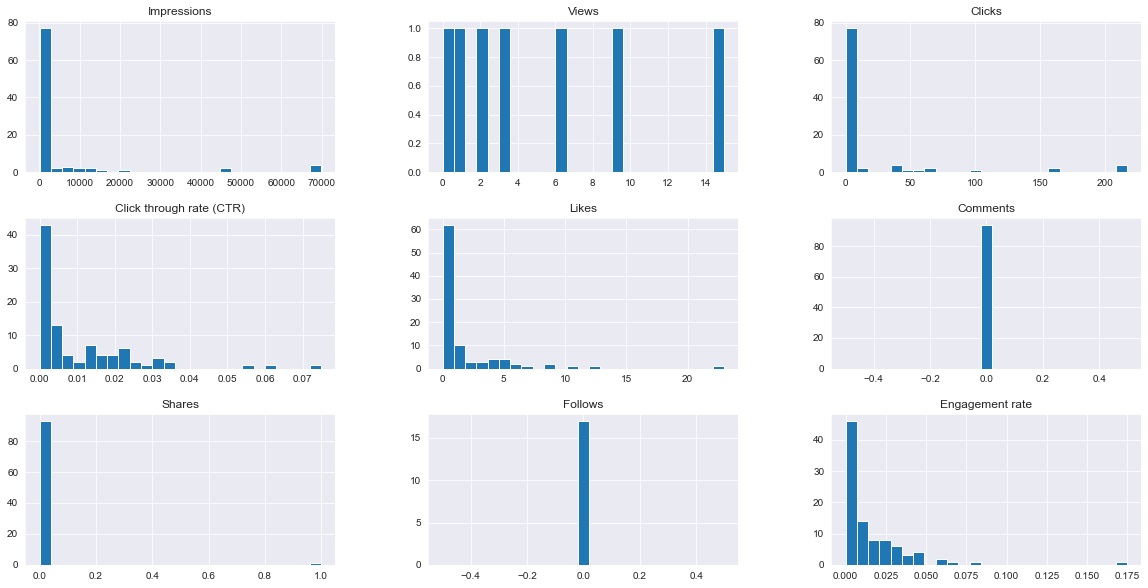

In [9]:
li_update_engagement_df.hist(bins=25, figsize=(20,10))

Impressions, clicks, click through rate, likes, and engagement rate appear to be heavy tail distributions. These distributions make mean a misleading measure of central tendency.

There are likely correlations that can be inferred across the above numerical features given their relative distributions.

## Cleaning Data

### Update Engagement Dataset

Importing modules.

In [10]:
from modules.reformat_feature_name import reformat_feature_name

#### Refactoring Feature Names

We'll reformat our feature names to follow a standardized convention. This will make the code easier to work with, improve readability, and improve reproducability.

To do so, I've created a module to handle the reformatting processes. A modular format was implemented to enable unit testing without the unnecessary overhead that comes with importing modules from jupyter notebooks and littering this code with unittest test cases.

Here's our implementation:

In [14]:
# extracting list of feature names
cols = li_update_engagement_df.columns

# creating hashmap to map old feature names to their reformatted versions
col_map = {}

# using imported module to clean feature names
for col in cols:
    new_col = reformat_feature_name(col)
    col_map[col] = new_col

# updating feature names within our dataframe
li_update_engagement_df.rename(columns=col_map, inplace=True)

Previewing the final result

In [17]:
li_update_engagement_df.head()

,update_title,update_link,update_type,campaign_name,posted_by,created_date,campaign_start_date,campaign_end_date,audience,impressions,views,clicks,click_through_rate_ctr,likes,comments,shares,follows,engagement_rate,content_type
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/28/2022,NaN,NaN,All followers,32,NaN,2,0.062500,0,0,0,NaN,0.062500,NaN
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/16/2022,NaN,NaN,All followers,44,NaN,1,0.022727,0,0,0,NaN,0.022727,NaN
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/16/2022,NaN,NaN,All followers,32,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/14/2022,NaN,NaN,All followers,61,NaN,0,0.000000,1,0,0,NaN,0.016393,NaN
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/08/2022,NaN,NaN,All followers,61,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN
